In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hospital visits by state

In [3]:
er_hospital_states = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Jurisdiction Counts & Rates')
er_hospital_states

,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,count_stimulant,...,count_benzodiazepine,population,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,AK,all,2018,annual,ED,792,230,NaN,135,48,...,44,736624,107.5,31.2,NaN,18.3,6.5,suppressed,NaN,6
1,AK,all,2018,annual,HOSP,335,107,NaN,27,53,...,26,736624,45.5,14.5,NaN,3.7,7.2,suppressed,NaN,3.5
2,AK,all,2019,annual,ED,768,249,NaN,126,44,...,27,733603,104.7,33.9,NaN,17.2,6,suppressed,NaN,3.7
3,AK,all,2019,annual,HOSP,346,112,NaN,25,70,...,22,733603,47.2,15.3,NaN,3.4,9.5,suppressed,NaN,3
4,AK,all,2020,annual,ED,814,320,NaN,131,50,...,28,732964,111.1,43.7,NaN,17.9,6.8,suppressed,NaN,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,WI,12,2021,monthly,HOSP,153,70,11,19,27,...,14,5879978,2.6,1.2,suppressed,suppressed,0.5,suppressed,NaN,suppressed
5105,WI,12,2022,monthly,ED,562,227,13,95,20,...,37,5890543,9.5,3.9,suppressed,1.6,0.3,suppressed,suppressed,0.6
5106,WI,12,2022,monthly,HOSP,158,59,16,17,27,...,11,5890543,2.7,1,suppressed,suppressed,0.5,0.4,suppressed,suppressed
5107,WI,12,2023,monthly,ED,481,147,16,36,26,...,10,5910955,8.1,2.5,suppressed,0.6,0.4,suppressed,suppressed,suppressed


In [4]:
er_hospital_states['count_fentanyl'] = pd.to_numeric(er_hospital_states['count_fentanyl'], errors = 'coerce')
er_hospital_states['count_cocaine'] = pd.to_numeric(er_hospital_states['count_cocaine'], errors = 'coerce')

# How many annual inpatient hospitalizations vs emergency room? 

## Count ODs of per state from 2018 - 2023

### Emergency Dept nonfatal ODs 

In [77]:
yearly2018_2023ed = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
yearly2018_2023ed

,jurisdiction,count_fentanyl,count_cocaine
0,AK,270.0,0.0
1,AZ,4800.0,482.0
2,CA,20393.0,4976.0
3,CO,2850.0,472.0
4,DC,66.0,114.0
5,FL,10026.0,5273.0
6,GA,1964.0,1449.0
7,HI,14.0,46.0
8,IA,161.0,109.0
9,IL,1125.0,1881.0


### Inpatient Hospitalizations nonfatal ODs 

In [10]:
yearly2018_2023hosp = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
    
)
yearly2018_2023hosp

,jurisdiction,count_fentanyl,count_cocaine
0,AK,99.0,81.0
1,AZ,2376.0,876.0
2,CA,7477.0,7897.0
3,CO,747.0,912.0
4,DC,65.0,736.0
5,DE,357.0,591.0
6,FL,4386.0,14312.0
7,GA,1140.0,5752.0
8,HI,11.0,112.0
9,IA,45.0,136.0


(0.0, 20000.0)

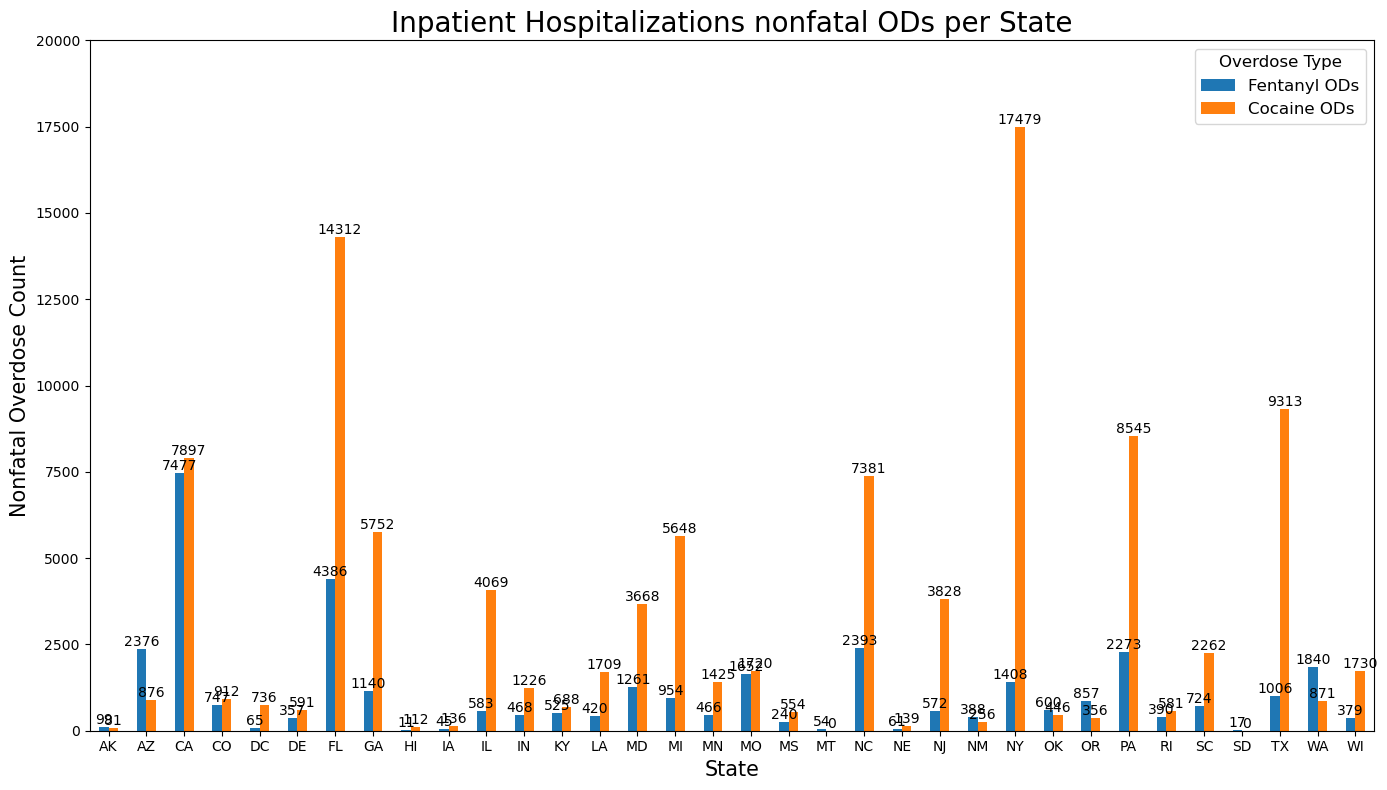

In [11]:

ax= yearly2018_2023hosp.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Inpatient Hospitalizations nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

plt.ylim(bottom=0, top=20000)

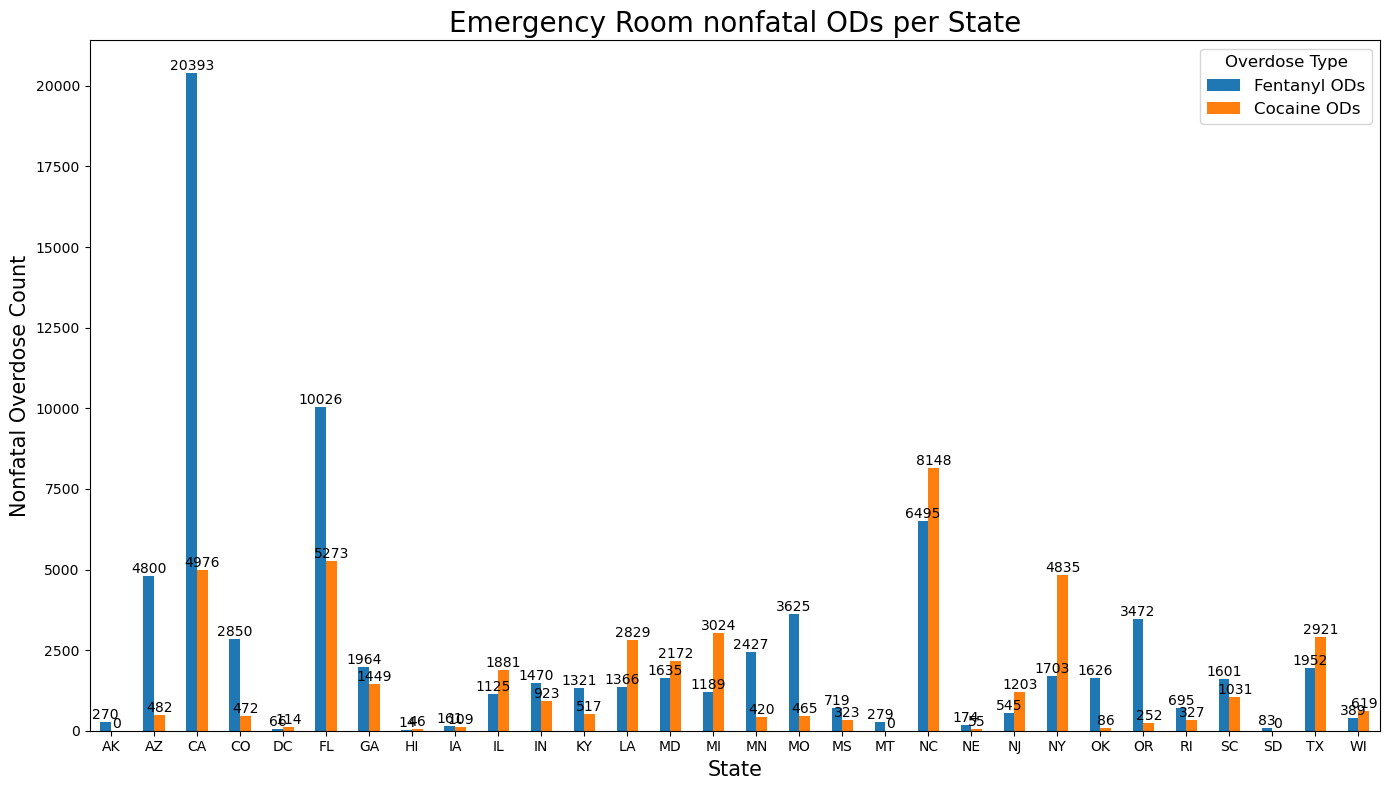

In [79]:

ax= yearly2018_2023ed.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Emergency Room nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

#plt.ylim(bottom=0, top=36000)

# Comparing Emergency Dept Vs Hospitalizations

## Cocaine OD Visits

In [15]:
cocaine_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_cocaine'].sum().reset_index()
    
)
cocaine_visits_count

,jurisdiction,dataset,count_cocaine
0,AK,ED,0.0
1,AK,HOSP,81.0
2,AZ,ED,621.0
3,AZ,HOSP,1610.0
4,CA,ED,9952.0
...,...,...,...
59,TX,ED,5842.0
60,TX,HOSP,18626.0
61,WA,HOSP,1505.0
62,WI,ED,980.0


Text(0.5, 1.0, 'Number of Cocaine Vists per State')

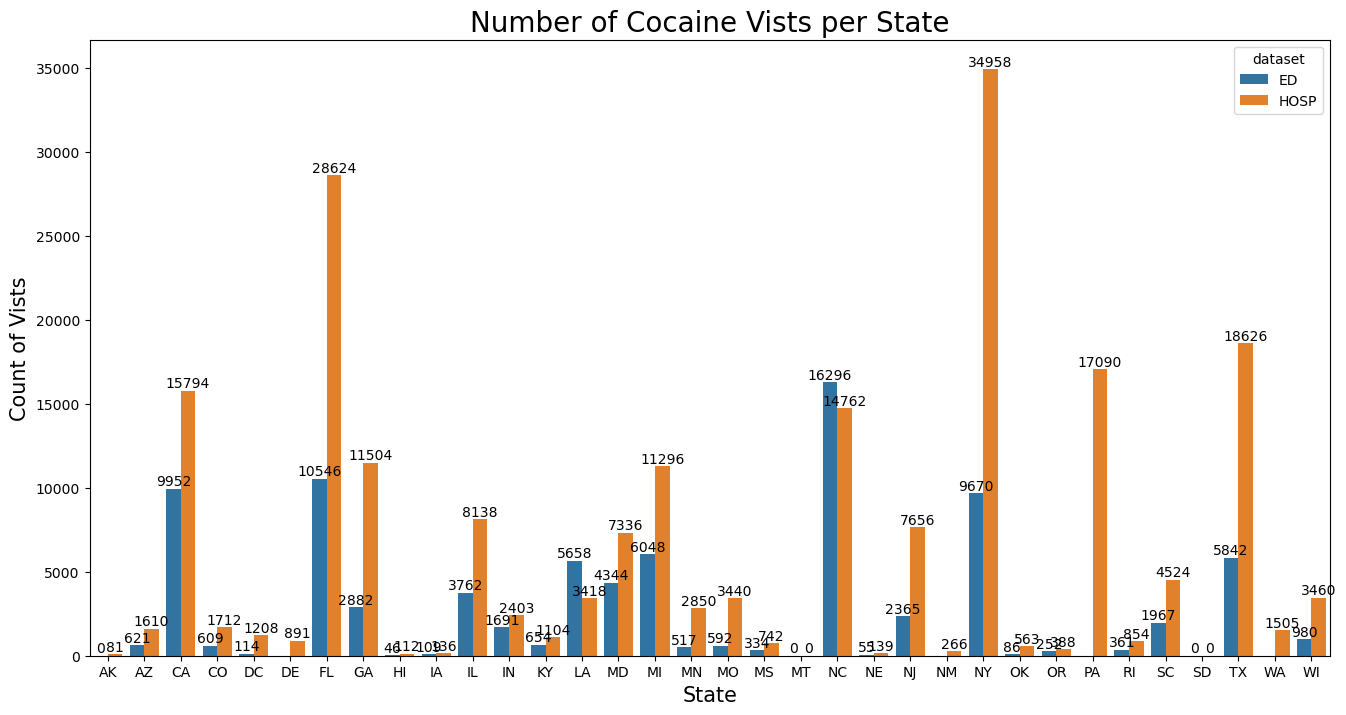

In [83]:
plt.figure(figsize=(16, 8))

ax= sns.barplot(x='jurisdiction', y= 'count_cocaine', hue='dataset', data= cocaine_visits_count)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel('State',fontsize=15)
plt.ylabel('Count of Vists',fontsize=15)
plt.title('Number of Cocaine Vists per State',fontsize= 20)

## Fentanyl OD visits

In [18]:
fentanyl_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    
)
fentanyl_visits_count



,jurisdiction,dataset,count_fentanyl
0,AK,ED,451.0
1,AK,HOSP,133.0
2,AZ,ED,9842.0
3,AZ,HOSP,4865.0
4,CA,ED,41445.0
...,...,...,...
59,TX,ED,3934.0
60,TX,HOSP,1954.0
61,WA,HOSP,3640.0
62,WI,ED,670.0


Text(0.5, 1.0, 'Number of Fentanyl Vists per State')

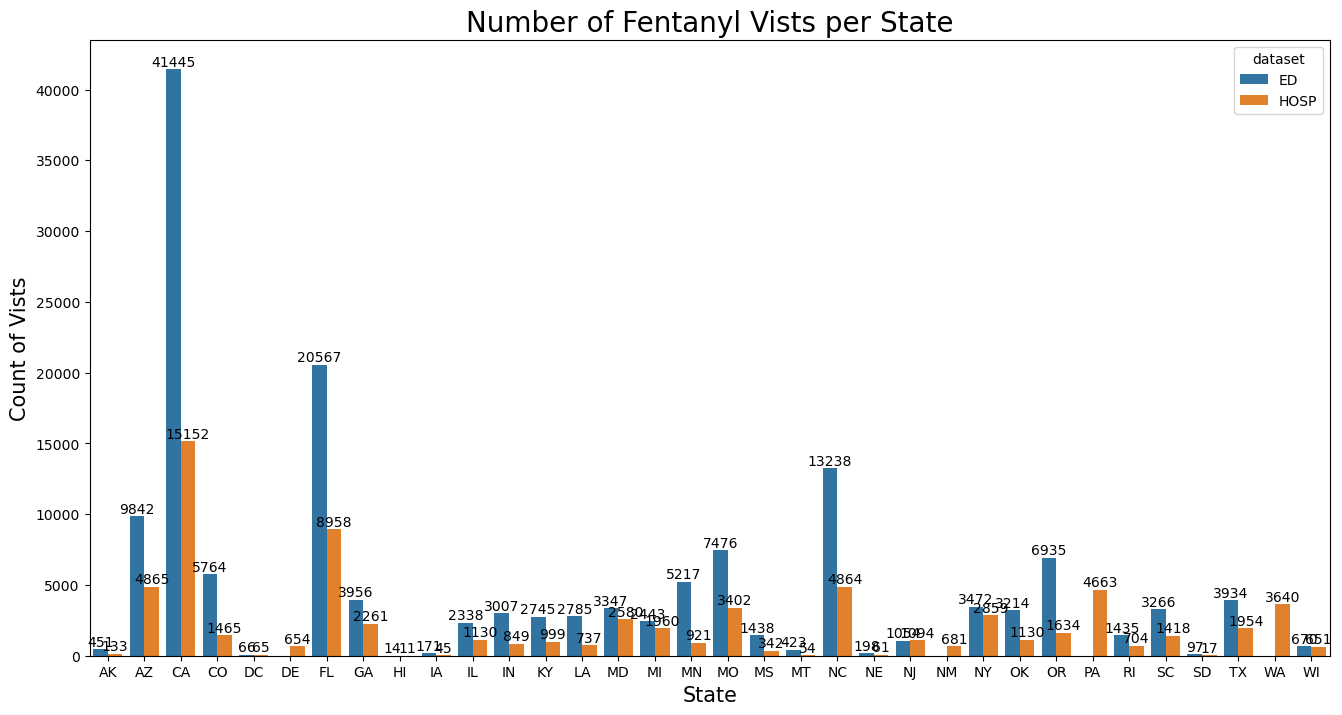

In [85]:
plt.figure(figsize=(16, 8))

ax= sns.barplot(x='jurisdiction', y= 'count_fentanyl', hue='dataset', data= fentanyl_visits_count)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel('State',fontsize=15)
plt.ylabel('Count of Vists',fontsize=15)
plt.title('Number of Fentanyl Vists per State', fontsize= 20)


## Count of overdose by year

In [21]:
annual_HOSP_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_HOSP_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,17258.0
1,2019,0.0,17978.0
2,2020,0.0,16596.0
3,2021,7406.0,17402.0
4,2022,10950.0,17316.0
5,2023,17878.0,18749.0


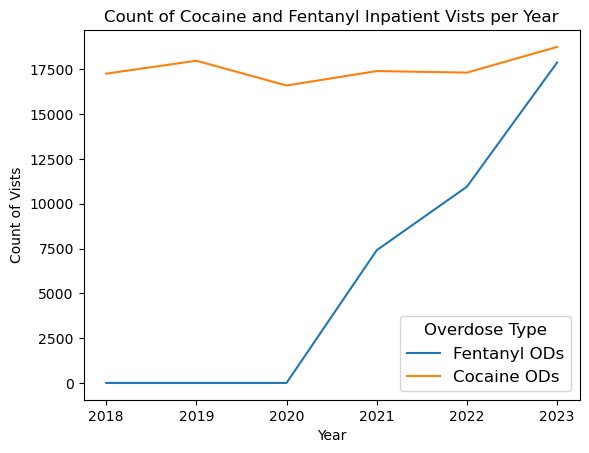

In [22]:
#set x-axis
annual_HOSP_visits= annual_HOSP_visits.set_index('year')
#set y-axis
annual_HOSP_visits.plot(y=['count_fentanyl','count_cocaine'])


plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)



In [23]:
annual_ED_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_ED_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,7125.0
1,2019,0.0,6791.0
2,2020,0.0,7034.0
3,2021,18766.0,7973.0
4,2022,24104.0,8430.0
5,2023,31565.0,7599.0


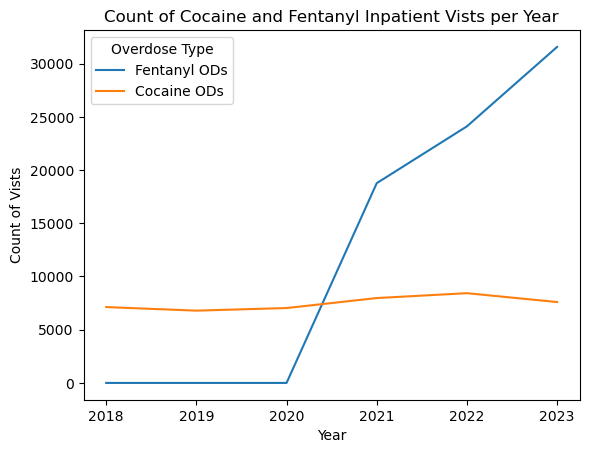

In [24]:
#set x-axis
annual_ED_visits= annual_ED_visits.set_index('year')
#set y-axis
annual_ED_visits.plot(y=['count_fentanyl','count_cocaine'])

plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=10, fontsize=10)

#ax = sns.lineplot(x='year', y=['count_fentanyl','count_cocaine'], data= annual_HOSP_visits)

In [32]:
coke_us_ods= (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction'] == 'US']
    .loc[er_hospital_states['month'] == 'all']
    [['year','jurisdiction','dataset','count_cocaine']]
    #.groupby(['year'])[['dataset', 'count_cocaine']].sum().reset_index()
)
coke_us_ods


,year,jurisdiction,dataset,count_cocaine
363,2018,US,ED,7147.0
364,2018,US,HOSP,17270.0
365,2019,US,ED,6808.0
366,2019,US,HOSP,17985.0
367,2020,US,ED,7062.0
368,2020,US,HOSP,16604.0
369,2021,US,ED,7986.0
370,2021,US,HOSP,17405.0
371,2022,US,ED,8450.0
372,2022,US,HOSP,17331.0


In [28]:
pop = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction'] == 'US']
    .loc[er_hospital_states['month'] == 'all']
    #.loc[er_hospital_states['population']]
    .groupby('year')['population'].value_counts()
)
pop 

year  population
2018  237000000     1
      264000000     1
2019  238000000     1
      265000000     1
2020  240000000     1
      268000000     1
2021  244000000     1
      268000000     1
2022  245000000     1
      269000000     1
2023  246000000     1
      270000000     1
Name: count, dtype: int64

# Age group analysis

In [36]:
age_range_df = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Overall by Sex & Age')
age_range_df

,jurisdiction,sex,age,month,year,time_frame,dataset,population,count_alldrug,count_opioid,...,count_methamphetamine,count_benzodiazepine,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,US,F,0-14,1,2018,monthly,ED,21721263,1754,49,...,NaN,56,8.1,0.2,NaN,0,0.3,suppressed,NaN,0.3
1,US,F,0-14,2,2018,monthly,ED,21721263,1652,53,...,NaN,61,7.6,0.2,NaN,suppressed,0.4,suppressed,NaN,0.3
2,US,F,0-14,3,2018,monthly,ED,21721263,1691,36,...,NaN,65,7.8,0.2,NaN,0,0.4,suppressed,NaN,0.3
3,US,F,0-14,4,2018,monthly,ED,21721263,1717,46,...,NaN,66,7.9,0.2,NaN,0,0.4,suppressed,NaN,0.3
4,US,F,0-14,5,2018,monthly,ED,21721263,1850,51,...,NaN,64,8.5,0.2,NaN,suppressed,0.3,suppressed,NaN,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,US,M,55+,9,2023,monthly,HOSP,38005604,2500,966,...,134,158,6.6,2.5,0.7,0.3,1.7,1.1,0.4,0.4
1556,US,M,55+,10,2023,monthly,HOSP,38005604,2524,978,...,114,148,6.6,2.6,0.7,0.3,1.7,1.2,0.3,0.4
1557,US,M,55+,11,2023,monthly,HOSP,38005604,2353,882,...,135,144,6.2,2.3,0.6,0.3,1.7,1.1,0.4,0.4
1558,US,M,55+,12,2023,monthly,HOSP,38005604,2370,844,...,126,148,6.2,2.2,0.6,0.3,1.7,1.1,0.3,0.4


In [42]:
age = (
    age_range_df
    .loc[age_range_df['month'] == 'all']
    [['sex', 'age', 'year','count_cocaine','count_fentanyl']]
)
age 

,sex,age,year,count_cocaine,count_fentanyl
12,F,0-14,2018,19,NaN
25,F,15-24,2018,372,NaN
38,F,25-34,2018,741,NaN
51,F,35-54,2018,973,NaN
64,F,55+,2018,344,NaN
...,...,...,...,...,...
1507,M,0-14,2023,81,226
1520,M,15-24,2023,416,1212
1533,M,25-34,2023,1748,3293
1546,M,35-54,2023,4827,4946


In [75]:
counts_by_age_group = (
    age
    .groupby('age')[['count_cocaine','count_fentanyl']].sum().reset_index()
)
counts_by_age_group

,age,count_cocaine,count_fentanyl
0,0-14,1000,1465
1,15-24,9658,15551
2,25-34,27819,37416
3,35-54,61463,40811
4,55+,50340,15323


## Female

In [67]:
female_age_group = (
    age
    .loc[age['sex'] == 'F']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
female_age_group

count_cocaine count_fentanyl
year age                               
2018 0-14             43              0
     15-24           697              0
     25-34          1757              0
     35-54          3679              0
     55+            2269              0
2019 0-14             61              0
     15-24           608              0
     25-34          1598              0
     35-54          3912              0
     55+            2680              0
2020 0-14             66              0
     15-24           683              0
     25-34          1586              0
     35-54          3408              0
     55+            2403              0
2021 0-14             91            136
     15-24           568           1323
     25-34          1601           2653
     35-54          3560           2533
     55+            2733           1052
2022 0-14            111            206
     15-24           615           1705
     25-34          1641           3487
     35-54          3502           3657
     55+            2995           1499
2023 0-14            105            318
     15-24           541           2164
     25-34          1578           4522
     35-54          3589           5639
     55+            3090           2281

In [ ]:
## Male

In [63]:
male_age_group = (
    age
    .loc[age['sex'] == 'M']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
male_age_group

count_cocaine count_fentanyl
year age                               
2018 0-14             68              0
     15-24          1198              0
     25-34          3164              0
     35-54          6547              0
     55+            4981              0
2019 0-14             50              0
     15-24          1092              0
     25-34          2838              0
     35-54          6541              0
     55+            5396              0
2020 0-14             64              0
     15-24          1022              0
     25-34          2967              0
     35-54          6176              0
     55+            5276              0
2021 0-14            103            172
     15-24           958           2851
     25-34          3064           6848
     35-54          6778           6500
     55+            5906           2115
2022 0-14             99            260
     15-24           871           3450
     25-34          3034           8571
     35-54          6842           9076
     55+            6049           3124
2023 0-14            139            373
     15-24           805           4058
     25-34          2991          11335
     35-54          6929          13406
     55+            6562           5252